In [20]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import cactas as C

In [22]:
model = C.Helper.load_unet('/raid/psych/CACTAS/unet_full_33_cases_weights.hdf5')

2023-01-28 21:01:39.052717: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-01-28 21:01:39.058209: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-01-28 21:01:39.575672: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-01-28 21:01:39.575728: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-01-28 21:01:39.575735: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-01-28 21:01:39.583679: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 38425 MB memory) -> physical GPU (device: 0, name: A100-SXM4-40GB, pci bus id: 0000:47:00.0, compute capabili

In [23]:
TEST_DATA = '/raid/mpsych/CACTAS/DATA/Nathan_Test/'
TEST_DATA_IGNORE = [41,51,61] # z-spacing different

In [24]:
import os
TEST_SCANS = sorted(os.listdir(TEST_DATA))

In [25]:
TEST_SCANS[0]

'ESUS 10'

In [26]:
os.listdir(TEST_DATA+TEST_SCANS[0])

['ESUS 10_4 Unnamed Series.nrrd', 'ESUS 10_Segmentation.seg.nrrd']

In [27]:
image, label = C.Util.load(0, datapath=TEST_DATA)

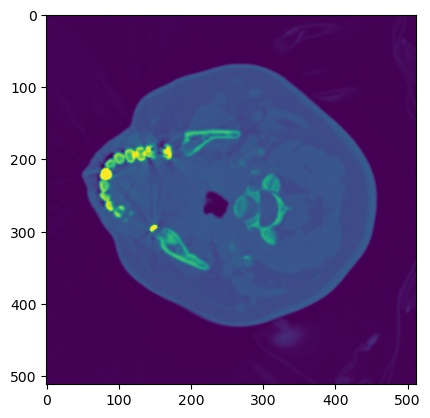

In [40]:
imshow(image[:,:,110])

In [85]:
test_image = image[:,:,104]

In [86]:
test_image = C.Util.normalize(test_image)

In [87]:
test_image_pred = model.predict(test_image.reshape(1,512,512,1))

In [88]:
test_image_pred.max()

0.09702239

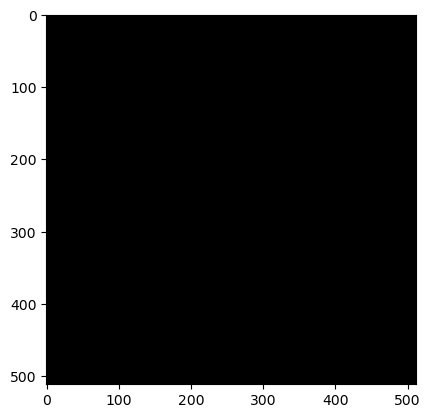

In [89]:
imshow(C.Util.binarize(test_image_pred[0,:,:,0], threshold=.5),cmap = 'gray')

In [47]:
test_image_pred.astype

0.0

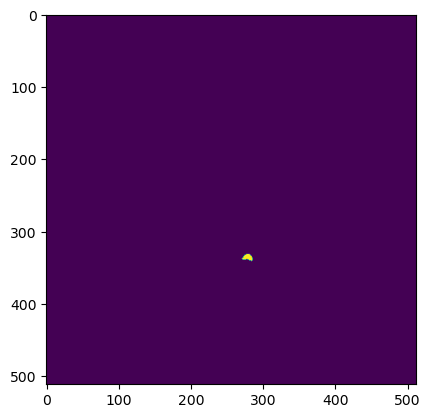

In [39]:
imshow(label[:,:,110])

In [93]:
import time

In [143]:
t0 = time.time()
image_pred = np.zeros(label.shape, label.dtype)

jaccard_per_slice = []

for z in range(image.shape[2]):
    
    cur_slice = image[:,:,z]
    
    cur_slice = C.Util.normalize(cur_slice)
    
    cur_slice_pred = model.predict(cur_slice.reshape(1,512,512,1))
    
    cur_slice_pred = C.Util.binarize(cur_slice_pred[0,:,:,0], threshold=.5)
    
    image_pred[:,:,z] = cur_slice_pred
    
    jac = C.Util.jaccard(C.Util.binarize(label[:,:,z]), cur_slice_pred)

    jaccard_per_slice.append(jac)
    
#     print('predicted', z)
print(time.time()-t0, 'seconds')

25.67206883430481 seconds


In [144]:
np.mean(jaccard_per_slice), np.std(jaccard_per_slice)

(0.39688863082513465, 0.4834835972139254)